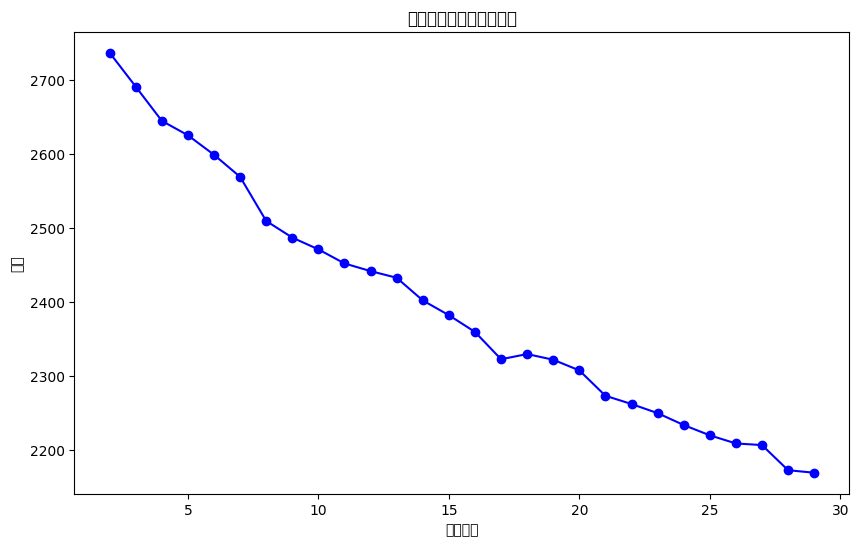

In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. 读取文件
file_path = 'aspect.txt'  # 文件路径
with open(file_path, 'r', encoding='utf-8') as file:
    data = file.readlines()
data = [line.strip() for line in data if line.strip()]

# 2. TF-IDF 向量化
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data)

# 3. 使用肘部方法确定最佳聚类数量
inertia = []
K = range(2, 30)  # 聚类数量的范围
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    inertia.append(kmeans.inertia_)

# 绘制肘部图
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('聚类数目')
plt.ylabel('惯性')
plt.title('肘部方法确定最佳聚类数')
plt.show()

In [4]:
optimal_clusters = 17  # 这里假设最佳聚类数为4
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=42).fit(X)

# 5. 输出聚类结果
clustered_data = pd.DataFrame({'text': data, 'cluster': kmeans_optimal.labels_})
print(clustered_data)

                                     text  cluster
0                            value, price        6
1                             Okonomiyaki       12
2                         lager selection       12
3                         value for money        6
4             Allenbell charge a WiFi fee        9
...                                   ...      ...
2819                              ADDRESS        1
2820                       features, vibe       12
2821                 shower head pressure       12
2822                portion sizes, dishes       12
2823  selection of nonalcoholic beverages       12

[2824 rows x 2 columns]


/disk2/anaconda3/envs/knowdialog/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


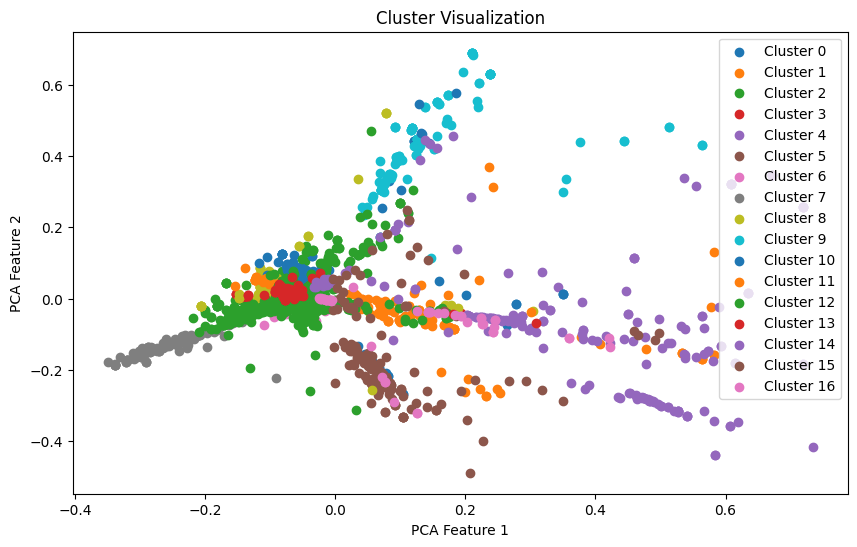

In [5]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pandas as pd

# 读取文本数据
file_path = 'aspect.txt'  # 替换为您文件的路径
with open(file_path, 'r', encoding='utf-8') as file:
    texts = file.readlines()
texts = [text.strip() for text in texts if text.strip()]

# 向量化文本数据
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(texts)

# 使用KMeans进行聚类
optimal_clusters = 17  # 基于前面的分析，我们选择17个聚类
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(X)

# 使用PCA进行降维以便可视化
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(X.toarray())

# 绘制聚类结果
plt.figure(figsize=(10, 6))
for i in range(optimal_clusters):
    # 选出属于该聚类的点
    points = reduced_features[kmeans.labels_ == i]
    plt.scatter(points[:, 0], points[:, 1], label=f'Cluster {i}')
plt.title('Cluster Visualization')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.legend()
plt.show()


In [13]:
with open('aspect.txt', 'r', encoding='utf-8') as file:
    texts = file.readlines()

texts = [text.strip() for text in texts if text.strip()]
print(texts)
##现在的texts是['value, price', 'Okonomiyaki', 'lager selection', 'value for money']
##但是我希望再分，比如['value', 'price', 'Okonomiyaki', 'lager selection', 'value for money']
##这样的话，我就可以把value和price分开来了
new_texts = []
for text in texts:
    new_texts.extend(text.split(','))
#转为set
new_texts = set(new_texts)
print(len(new_texts))



['value, price', 'Okonomiyaki', 'lager selection', 'value for money', 'Allenbell charge a WiFi fee', 'Vindaloo, price', 'rooms, sounding', 'dining, price range', 'bridge house', 'expenses', 'Internet access', 'rooms, B&B', 'Portuguese food', 'serve non-alcoholic drink options', 'moroccan food', 'parking, internet, amenities', 'outdoor dining, seating', 'phone number, postal code', 'price range, hotel type', 'bathrroms', 'selection of beverages, alcohol', 'price range, parking, wifi', 'furnishings, bed', 'internet work', 'Wifi, connection', 'al fresco dining', '4 star guesthouse, parking', 'price range, value for the money', 'Vietnamese food', 'dining patio', 'priced hotel, free wifi', 'outdoor area, dining', 'quality ma po tofu', 'chicken tandoori', 'price range, postal code', 'quality naan', 'cocktails, alcoholic beverages', 'address, food, serve', 'breakfast chef', 'bedding', 'bed, rooms', 'bathrooms, bathroom', 'bathroom facility', 'housing keeping', 'Gluten-free breakfast options',

/disk2/anaconda3/envs/knowdialog/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/disk2/anaconda3/envs/knowdialog/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/disk2/anaconda3/envs/knowdialog/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/disk2/anaconda3/envs/knowdialog/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress t

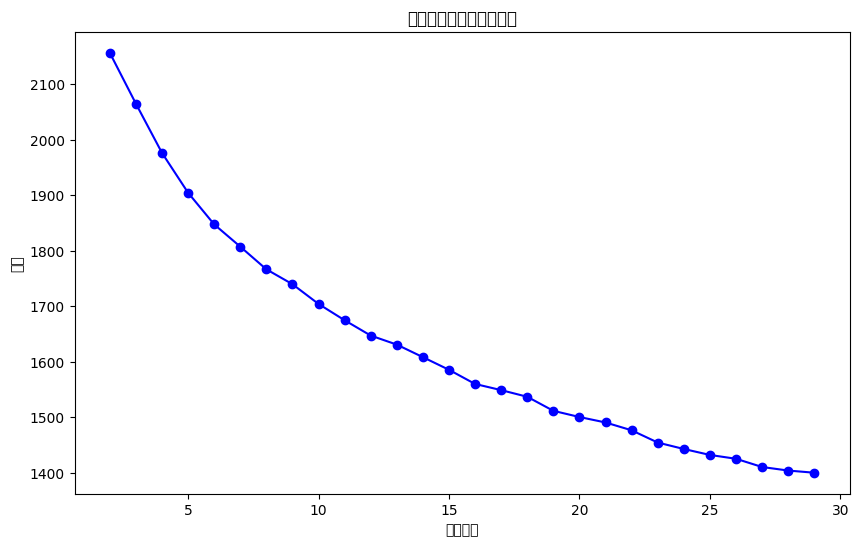

In [17]:
from sentence_transformers import SentenceTransformer
similarity_model = SentenceTransformer('/home/zhuangjt/zhuangjt_disk3/SK-TOD/PLM/all-MiniLM-L6-v2')
embeddings = similarity_model.encode(texts)
# 3. 使用肘部方法确定最佳聚类数量
inertia = []
K = range(2, 30)  # 聚类数量的范围
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(embeddings)
    inertia.append(kmeans.inertia_)

# 绘制肘部图
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('聚类数目')
plt.ylabel('惯性')
plt.title('肘部方法确定最佳聚类数')
plt.show()

In [2]:
import json
def load_json(path):
    with open(path, "r") as f:
        return json.load(f)
    
datas = load_json('./test/labels.json')
count = 0
for data in datas:
    if data["target"] == True:
        count += 1
print(count)


2798
